<a href="https://colab.research.google.com/github/aronnly/Dados_do_Airbnb/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

Dentre essas principais cidades, vamos hoje conhecer como as relações entre "*hôtes*" e "invités" se desenvolvem numa das cidades que mais recebe turistas no mundo todo, e que recebeu o nome de Cidade Luz por ter abrigado as mais célebres mentes da história recente: vamos mergulhar em Paris.

<center><img alt="Analisando Airbnb" width="60%" src="https://rb.gy/qbsder"></center>







## Breve panorama histórico

Ficar próximo de grandes monumentos ou uma bela localização nessas cidades pode ser difícil e bastante custoso para a maioria das pessoas, não ?!

Além disso, se você, enquanto morador local, possui um imóvel parado em condições habitáveis, até que uma grana extra, sem grandes burocracias, interligando você e uma outra pessoa, não seria nada mal também. 
<center><img alt="Analisando Airbnb" width="40%" src="https://i.kym-cdn.com/entries/icons/mobile/000/037/756/tumblr_51be9495b7d2df0478e1a50e0019c80e_cd8caf23_500.jpg"></center>

Foi essa a demanda que o Airbnb veio atender e conectar duas necessidades complementares. 

Com o passar do tempo, essa situação foi incomodando os grandes grupos hoteleiros que antes dominavam a cena nas capitais globais. Junto com isso, ainda houve muitos episódios de degradação urbana e ambiental, consequência de uma infraestrutura que não atendia mais às demandas de turismo agora aumentadas pela facilidade de acesso à hospedagem. 

> Em meio à batalhas judiciais, assim como Nova Iorque, Paris tentou diminuir a quantidade de "moradias de curto prazo" realizando pesadas regulações, sobre como deveriam ser feitas as locações. 

> Dentre elas, estava a permissão somente emitida pela Câmara Municipal, diferenciar se o imóvel em questão é o principal do proprietário ou secundário e somente podendo alugar por 120 dias do ano estando sujeitos à uma multa de 5.000 a 10.000 euros. 

Essas polêmicas regulações foram bastante criticadas pela empresa americana por estarem sendo feitas por políticos apoiados pelos lobistas de grupos hoteleiros locais. 

No dia da [primeira conferência anti-Airbnb](https://abcnews.go.com/US/inside-1st-global-anti-airbnb-conference-huge-french/story?id=59290967) em 2018, a *start-up* da Califórnia contratou um [caminhão de propaganda](https://www.youtube.com/watch?v=RLPVrMIUGqE) com um vídeo explorando a narrativa de lucros milionários dos hotéis. 
<center><img alt="Analisando Airbnb" width="20%" src="https://i.makeagif.com/media/10-26-2015/85_Z2N.gif"></center>

Mas no fim das contas, infelizmente, o que permaneceu foi a diminuição da oferta em bairros mais nobres e um consequente aumento de preços, deixando um velho ditado americano pular na memória dos fundadores do Airbnb: *When money talks, bulshit walks* .

**Neste *notebook*, vamos ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2022-01-08/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - identificacao do imovel
* `name` - nome da propriedade 
* `host_id` - número gerado para identificar o host
* `host_name` - nome do host
* `neighbourhood_group` - nenhum valor valido
* `neighbourhood` - nome do bairro
* `latitude`
* `longitude`
* `room_type` - tipo de locação
* `price` - preço
* `minimum_nights` - número mínimo de noites contratadas
* `number_of_reviews` - número de avaliações
* `last_review` - data da última avaliação
* `reviews_per_month` - número de avaliações por mês
* `calculated_host_listings_count` - quantidade de imoveis do mesmo host
* `availability_365` - disponibilidade por ano


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [50]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,80,2,277,2022-01-04,1.82,1,66,45,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,10,290,2021-12-30,2.21,4,212,20,7510400829623
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.04,1,365,0,7510903576564
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,148,0,"Available with a mobility lease only (""bail mo..."
4,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86373,2.37093,Entire home/apt,80,4,34,2021-12-28,0.32,1,212,8,7511101582862


### **Tipos de variáveis e dimensões do dataframe**

Além de saber os aspectos gerais do *dataset*, precisamos saber se há a correspondência dos tipos de dados com que estamos trabalhando: `id` ser um int64, `latitude` e `longitude` estarem classificados em *float*. 

Caso haja alguma discrepância, precisaremos utilizar o método *astype* para corrigir e conseguirmos trabalhar com os dados corretamente classificados. 

In [4]:
# identificar o volume de dados do DataFrame

print("Dimensoes do dataset", 
        "\n Entradas:", df.shape[0], 
        "\n Variaveis:", df.shape[1])

# verificar os tipos do dataset
df.dtypes

Dimensoes do dataset 
 Entradas: 49255 
 Variaveis: 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

A variável `last_review` precisa ser convertida em *date_time* 

 

In [5]:
pd.to_datetime(df.last_review)

0       2022-01-04
1       2021-12-30
2       2015-09-14
3              NaT
4       2021-12-28
           ...    
49250          NaT
49251          NaT
49252          NaT
49253          NaT
49254          NaT
Name: last_review, Length: 49255, dtype: datetime64[ns]

### **Tratando valores ausentes**

Colunas com baixo poder preditivo ou grande número de dados faltantes, podem ser facilmente excluídas.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(pd.isna(df).sum()/df.shape[0]).sort_values(ascending = False) * 100

neighbourhood_group               100.000000
license                            42.793625
reviews_per_month                  20.818191
last_review                        20.818191
name                                0.087301
host_name                           0.056847
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

In [7]:
# excluindo a coluna "neighbourhood_group"
df2 = df.drop(columns = ['neighbourhood_group'])

###Tratando os *outliers*


Parar tratar os *outliers* iremos analisar a distruição estatística, plotar *box plots* e calcular os limites utilizando a técnica do IQR *Score*.

<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>


Temos outras técnicas de tratamento, como por exemplo, *Scatter plots* e *Z-Score*. 

Enfim, vamos lembrar o que é IQR.

O IQR é calculado subtraindo o terceiro quartil (75 %) do primeiro quartil (25 %).

##IQR = Q3 - Q1

Vamos ver as medidas estatísticas do nosso dataframe e ver quais *insights* conseguimos extrair.

#### Analisando os dados estatisticos do dataframe

In [8]:
df2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.925500e+04,4.925500e+04,49255.000000,49255.000000,49255.000000,49255.000000,49255.000000,39001.000000,49255.000000,49255.000000,49255.000000
mean,2.705569e+07,1.003104e+08,48.864027,2.344815,128.662958,107.989524,22.001746,0.803106,9.883118,103.157629,4.025439
std,1.649148e+07,1.223133e+08,0.018166,0.033069,228.886467,168.112081,46.790986,1.181524,33.269320,136.944962,13.453797
min,5.396000e+03,2.626000e+03,48.813380,2.235490,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.243887e+07,1.377774e+07,48.850820,2.324010,60.000000,2.000000,1.000000,0.120000,1.000000,0.000000,0.000000
50%,2.638693e+07,3.931433e+07,48.865340,2.347880,90.000000,4.000000,6.000000,0.380000,1.000000,3.000000,0.000000
75%,4.171415e+07,1.481276e+08,48.878550,2.369130,135.000000,365.000000,22.000000,1.000000,2.000000,208.000000,3.000000
max,5.418906e+07,4.393534e+08,48.903840,2.471660,11600.000000,9999.000000,1943.000000,53.040000,265.000000,365.000000,1737.000000



Repare bem a variável de `price` e `minimum_nights`: para essas duas, a possibilidade de termos um *outlier* é imensa. 

No caso do `price`, o IQR está em 75,00 (135-60).

Além disso, há situações em que o `price` esta em zero.

Para o `minumum_nights`, o terceiro quartil está em um mínimo de 365 noites. Claramente temos um *outlier* aqui.

Bem como também termos um número mínimo de noites ser quase 10.000. 

Podemos ainda, estudar a quantidade de imóveis que possuem uma baixa (por vezes zero) dias disponíveis do ano com a variável `availability_365`.
 

#### **Qual o tipo de distribuição das variáveis?** 

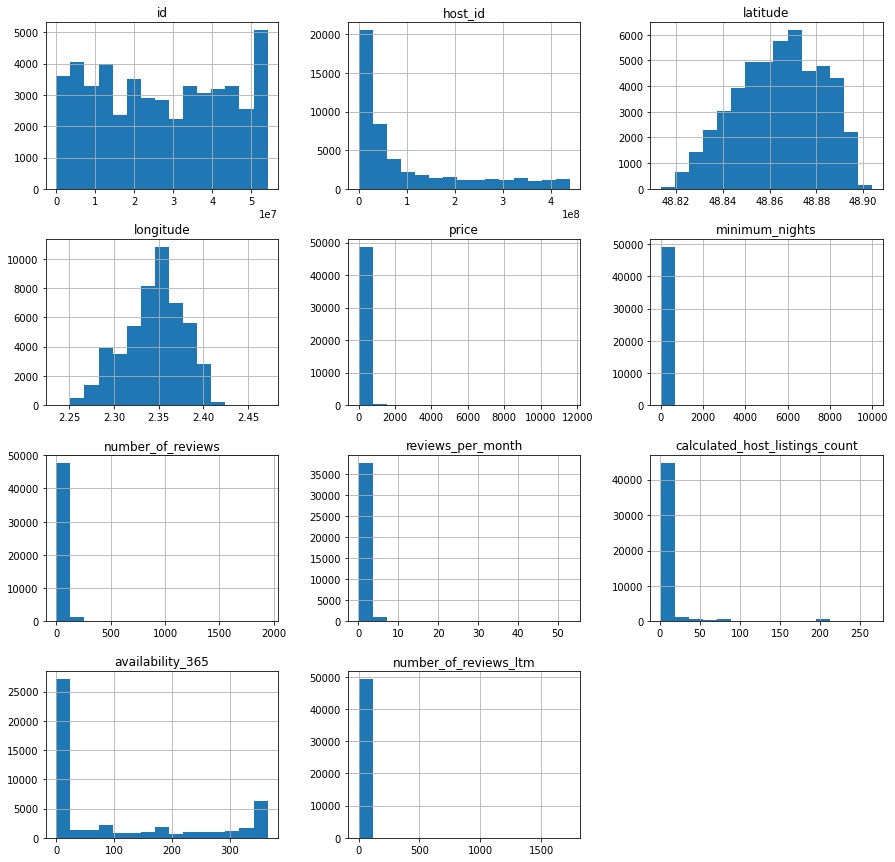

In [9]:
# plotar o histograma das variáveis numéricas
df2.hist(bins=15, figsize = (15,15));

Verificando os histogramas, observamos mais claramente em quais variáveis temos *outliers* presentes. Para tratá-los, vamos seguir os passos adiante:



*   Definir o Q1 e Q3 para as variáveis que serão tratadas
*   Calcular o IQR
*   Definir os limites superior e inferior para cortes
*   Remover os outliers



#### *Outliers* para  `price`

In [26]:
# identificando os outliers para a variavel price
q3_price = df2.price.quantile(0.75)
q1_price = df2.price.quantile(0.25)
IQR_price = q3_price - q1_price 
print('O IQR para price e ', IQR_price)

# definindo limites superior e inferior
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('O limite superior: {} \n'
'O limite inferior: {}'.format(sup_price, inf_price))

O IQR para price e  75.0
O limite superior: 247.5 
O limite inferior: -52.5


Para a variavel `price` nao verificamos outliers inferiores, mas temos casos em que os preços estão em zero. 

Da mesma maneira, precisam também ser tratados.

##### Análise do boxplot para price

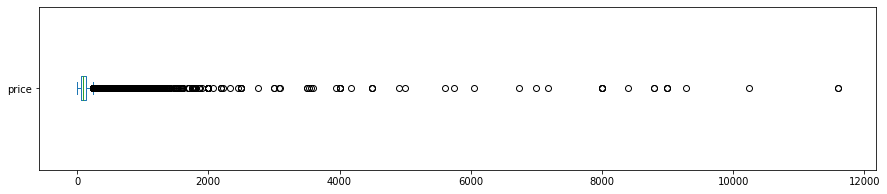

No total, temos 49255 entradas
Os valores acima de EUR 247,00 por dia representam 8.357 % da nossa amostra
Total de preços em 0 sao em  46


In [34]:
# price
df2.price.plot(kind='box', vert = False,figsize=(15,3))
plt.show()

#ver % de valores acima de 247 para price

print('No total, temos {} entradas'.format(df2.shape[0]))
print("Os valores acima de EUR 247,00 por dia representam {:.3f} % da nossa amostra".format(df2[df2.price >247].count()[0] / df2.shape[0] *100))
print("Total de  em 0 sao em ", df2[df2.price == 0].count()[0])

### *Outliers* para `minimum_nights`

In [48]:
# identificando os outliers 
q3_minimum_nights = df2.minimum_nights.quantile(0.75)
q1_minimum_nights = df2.minimum_nights.quantile(0.25)
IQR_minimum_nights = q3_minimum_nights -  q1_minimum_nights

print('O IQR para minimum_nights é:', IQR_minimum_nights)

# definindo os limites superior e inferior
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights



print('O limite superior é: ', sup_minimum_nights)
print('O limite inferior é: ',inf_minimum_nights)


O IQR para minimum_nights é: 363.0
O limite superior é:  909.5
O limite inferior é:  -542.5


Da mesma forma que a variavel `price`, nao temos outliers inferiores.
Porem, o limite superior tambem não nos ajuda muito.

Se voltarmos na tabela de estatisticas do nosso *dataframe*, veremos que o 3º quartil está em 365 noites mínimas para permanecer. 

Sendo a máxima em quase mil noites.

Para colocarmos em termos mais realistas, vamos assumir que os anúncios **não** estão em desacordo com o regime de 120 dias no ano posto pelo governo parisiense.

#### Boxplot para minimum_nights

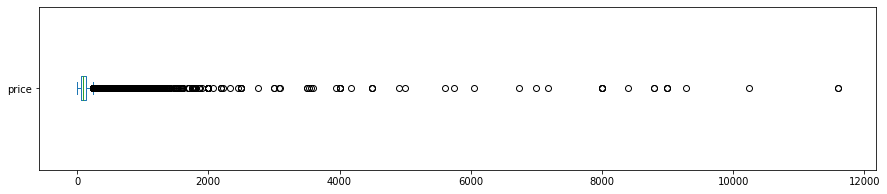

Os valores acima de 120 representam 28.34 % da nossa amostra


In [60]:
# minimum_nights
df2.price.plot(kind='box', vert = False, figsize=(15,3))
plt.show()

# ver % de valores acima de 120 
print('Os valores acima de 120 representam {:.2f} % da nossa amostra'.format(df2.query('minimum_nights> 120').count()[0]  / df2.shape[0] * 100
))


### Executando a limpeza dos outliers

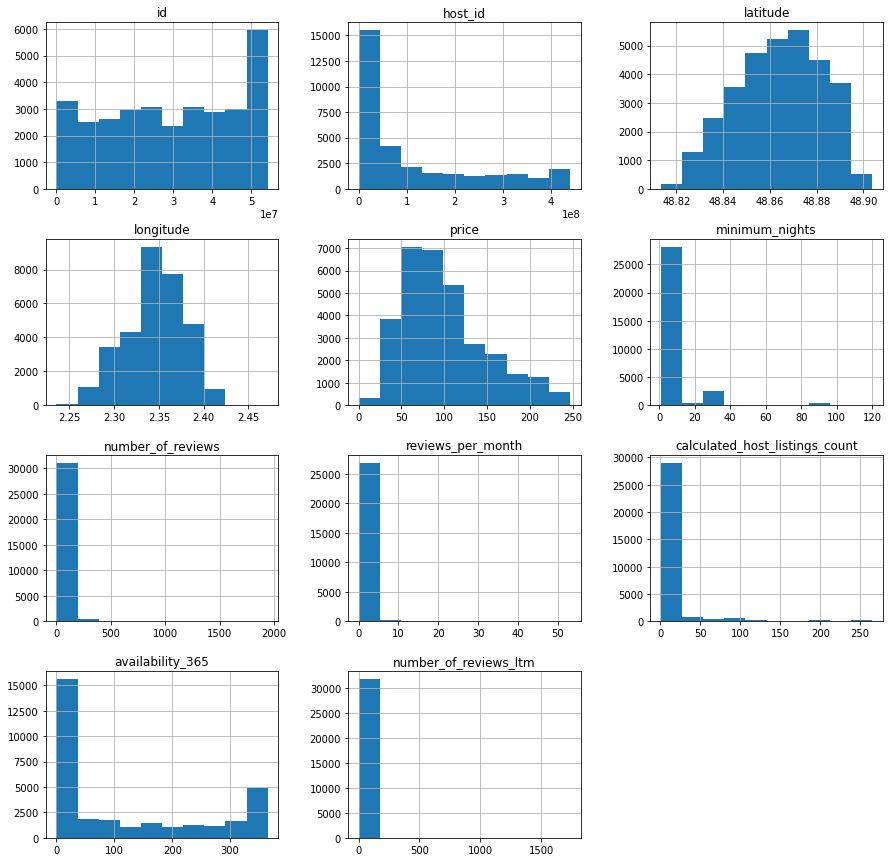

In [59]:
# limpeza de dados
df_clean = df2.copy()
df_clean.drop(df_clean[df_clean.price > 247].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 120].index, axis = 0, inplace = True)

# plotando novo histograma
df_clean.hist(figsize = (15,15));

#### Boxplot após a limpeza

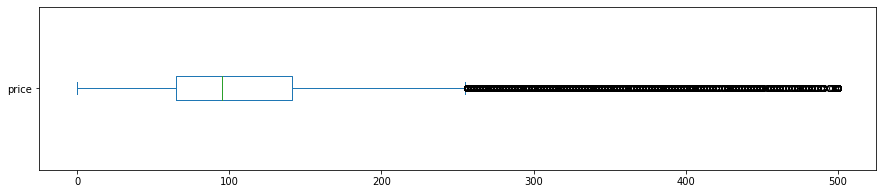

In [13]:
# para a variavel price
df_clean.price.plot(kind = 'box', vert = False, figsize = (15,3));

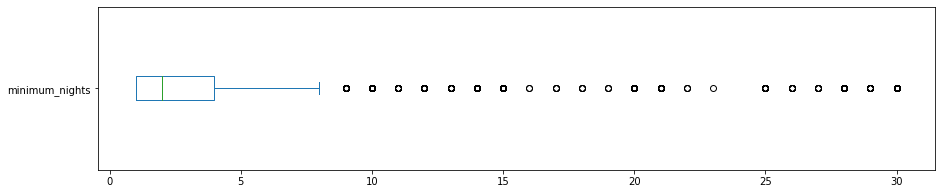

In [14]:
# para a variavel minimum_nights
df_clean.minimum_nights.plot(kind = 'box', vert = False, figsize = (15,3));

##### Dados estatísticos após a limpeza

In [70]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.173400e+04,3.173400e+04,31734.000000,31734.000000,31734.000000,31734.000000,31734.000000,27193.000000,31734.000000,31734.000000,31734.000000
mean,2.948228e+07,1.129660e+08,48.863837,2.346157,98.968677,6.439213,28.679397,1.002064,11.033875,118.131468,5.768293
std,1.676959e+07,1.310004e+08,0.018274,0.032728,48.890834,12.777751,54.129121,1.309841,34.657721,138.423787,16.244280
min,5.396000e+03,2.626000e+03,48.813380,2.235490,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.508527e+07,1.384424e+07,48.850543,2.326060,62.000000,1.000000,2.000000,0.220000,1.000000,0.000000,0.000000
50%,3.027373e+07,4.651598e+07,48.865210,2.348980,90.000000,2.000000,10.000000,0.570000,1.000000,40.000000,1.000000
75%,4.447333e+07,1.897700e+08,48.878440,2.370170,125.000000,4.000000,31.000000,1.280000,2.000000,251.000000,6.000000
max,5.418906e+07,4.393534e+08,48.903840,2.471660,247.000000,120.000000,1943.000000,53.040000,265.000000,365.000000,1737.000000


### **Média dos preços de aluguel?**

In [15]:
# ver a média da coluna `price``
print("A media de precos é de EUR {:.2f}".format(df_clean.price.mean()))

A media de precos é de EUR 117.05


### **Correlação existente entre as variáveis**

Primeiramente, precisamos enfatizar aquela máxima falácia em latim *cum hoc ergo propter hoc*, "com isto, logo por causa disto".

Em outras palavras, não é porque duas variáveis possuem relação que elas se associam com uma causalidade entre si. Ainda pode haver o caso de ambas terem o mesmo agente causador: daí o movimento.

Ou seja: correlação não é causalidade necessariamente. 

Apenas representa uma medida de como duas variáveis se relacionam.

Vamos enxergar melhor logo abaixo.

In [68]:
# criar uma matriz de correlação
df_clean.corr()
# mostrar a matriz de correlação


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.522349,0.018959,-0.060314,0.082238,-0.034782,-0.364338,0.235272,0.157294,0.158781,0.051225
host_id,0.522349,1.000000,-0.033020,-0.105100,0.109223,-0.050110,-0.159125,0.186047,0.176065,0.208726,0.065295
latitude,0.018959,-0.033020,1.000000,0.087128,-0.042338,-0.025479,-0.025296,-0.017741,-0.025099,-0.044064,-0.014008
longitude,-0.060314,-0.105100,0.087128,1.000000,-0.154164,-0.031506,-0.006110,-0.044440,-0.038305,-0.110522,-0.015814
price,0.082238,0.109223,-0.042338,-0.154164,1.000000,-0.019527,0.022052,0.064817,0.160344,0.302035,0.049698
minimum_nights,-0.034782,-0.050110,-0.025479,-0.031506,-0.019527,1.000000,-0.075076,-0.136505,0.235826,0.102816,-0.102338
number_of_reviews,-0.364338,-0.159125,-0.025296,-0.006110,0.022052,-0.075076,1.000000,0.593361,-0.044525,0.126785,0.556478
reviews_per_month,0.235272,0.186047,-0.017741,-0.044440,0.064817,-0.136505,0.593361,1.000000,0.069531,0.260626,0.728635
calculated_host_listings_count,0.157294,0.176065,-0.025099,-0.038305,0.160344,0.235826,-0.044525,0.069531,1.000000,0.218400,0.032990
availability_365,0.158781,0.208726,-0.044064,-0.110522,0.302035,0.102816,0.126785,0.260626,0.218400,1.000000,0.163851


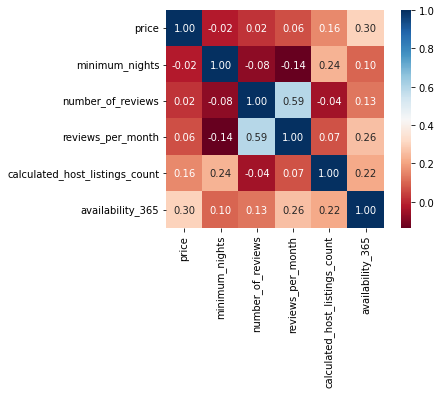

In [67]:
# plotar um heatmap a partir das correlações
matriz_de_correlacao = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
sns.heatmap(matriz_de_correlacao, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

Aqui, podemos tirar alguns pontos-chave:


*   Existe uma correlação positiva fraca entre `price` e `availability_365`, denotando que quanto maior preço, existe a chance de ser maior a disponibilidade durante o ano

*   Há ainda uma correlação **negativa** fraca entre `minimum_nights` e `reviews_per_month`, podendo ser associado ao fato de que quanto maior o número mínimo de noites, menor o número de avaliações feitas pelos usuários. 

Agora fica a seguinte questão: qual a relação entre os usuários que avaliam os imóveis e que efetivamente alugam ?



### **Qual o tipo de imóvel mais alugado no Airbnb?**

In [65]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    23961
Private room        6653
Hotel room           809
Shared room          311
Name: room_type, dtype: int64

In [66]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_imovel_disponivel = df_clean.room_type.value_counts()
df_clean.room_type.value_counts()/df_imovel_disponivel.sum()

Entire home/apt    0.755058
Private room       0.209649
Hotel room         0.025493
Shared room        0.009800
Name: room_type, dtype: float64

### **Qual a localidade mais cara do dataset?**



In [64]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood')["price"].mean().sort_values(ascending = False)


neighbourhood
Louvre                 129.435971
Élysée                 126.500000
Hôtel-de-Ville         124.387792
Temple                 122.001310
Bourse                 118.577089
Luxembourg             118.299492
Palais-Bourbon         116.582790
Panthéon               114.946644
Passy                  111.599278
Opéra                  111.222969
Batignolles-Monceau     97.723158
Vaugirard               96.277165
Entrepôt                94.664849
Popincourt              92.647039
Observatoire            88.661588
Reuilly                 87.975434
Buttes-Montmartre       85.604946
Gobelins                82.952181
Buttes-Chaumont         74.360503
Ménilmontant            74.345231
Name: price, dtype: float64

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [62]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

6.439213461902061

In [63]:
# plotar os imóveis pela latitude-longitude


Serão considerados `x=longitude` e `y=latitude`

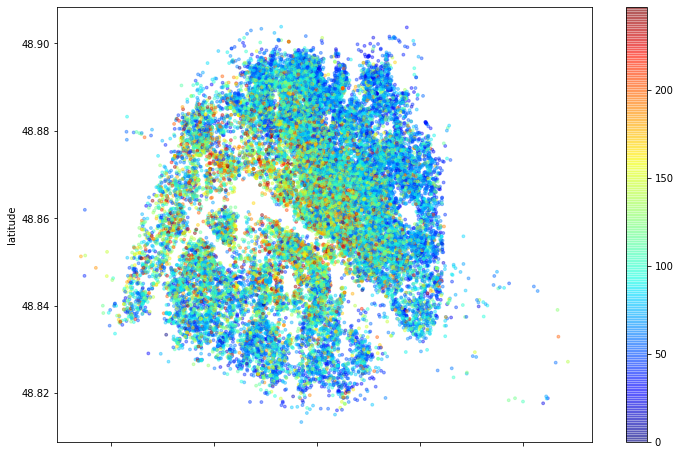

In [61]:
df_clean.plot(kind="scatter", x='longitude', y='latitude',alpha=0.4, c= df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Ao analizar as estruturas estatísticas iniciais que compõem a Cidade Luz, podemos perceber que há,inicialmente, a coluna `neighbourhood_group` que poderia ser retirada da análise e tratativas de dados por estar totalmente em branco. 

Passsando-se ao histograma, observa-se que o número de *outliers* é bem considerável *dataset*, destacado, principalmente, nas variáveis `price` e `minimum_nights`. 

Além do mais, há baixa correlação entre as variáveis apresentadas impossibilitando realizar associações que produzam algum efeito significativo. O máximo que poderia ser associado, seria uma correlação positiva entre o número de reviews com a disponibilidade durante o ano.

Finalmente, no que tange aos bairros, *Louvre*, *Élysée* e *Palais-Bourbon* são os *arrondissements* mais caros. Evidentemente, os mais próximos dos cartões postais da cidade. 

